In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral/Data_modelo


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the datasets
df_familia_pessoas_final = pd.read_csv('df_modelo.csv', sep=',')
#df_familia_pessoas_final = df_familia_pessoas_final.sample(10000)

In [ ]:
df_familia_pessoas_final = df_familia_pessoas_final[['pct_idosos', 'pct_deficientes', 'qtde_pessoas',
       'pct_trabalho_12meses_adulto', 'rf_trab_principal', 'rf_idade',
       'rf_curso_frequenta', 'pct_empregado_sem_carteira', 'pct_conta_propria',
       'uf_ibge', 'qtd_comodos_domic_fam', 'cod_iluminacao_domic_fam',
       'pct_extrativista', 'dias_cadastramento',
       'pct_trabalho_12meses_crianca', 'ideb_2017_municipio', 'classf',
       'dias_atualizacao', 'rf_sexo', 'pct_escolar_nunca_freq_escola',
       'pct_adulto_nunca_freq_escola', 'pct_freq_creche', 'pct_n_freq_escola', 'classe_renda']]

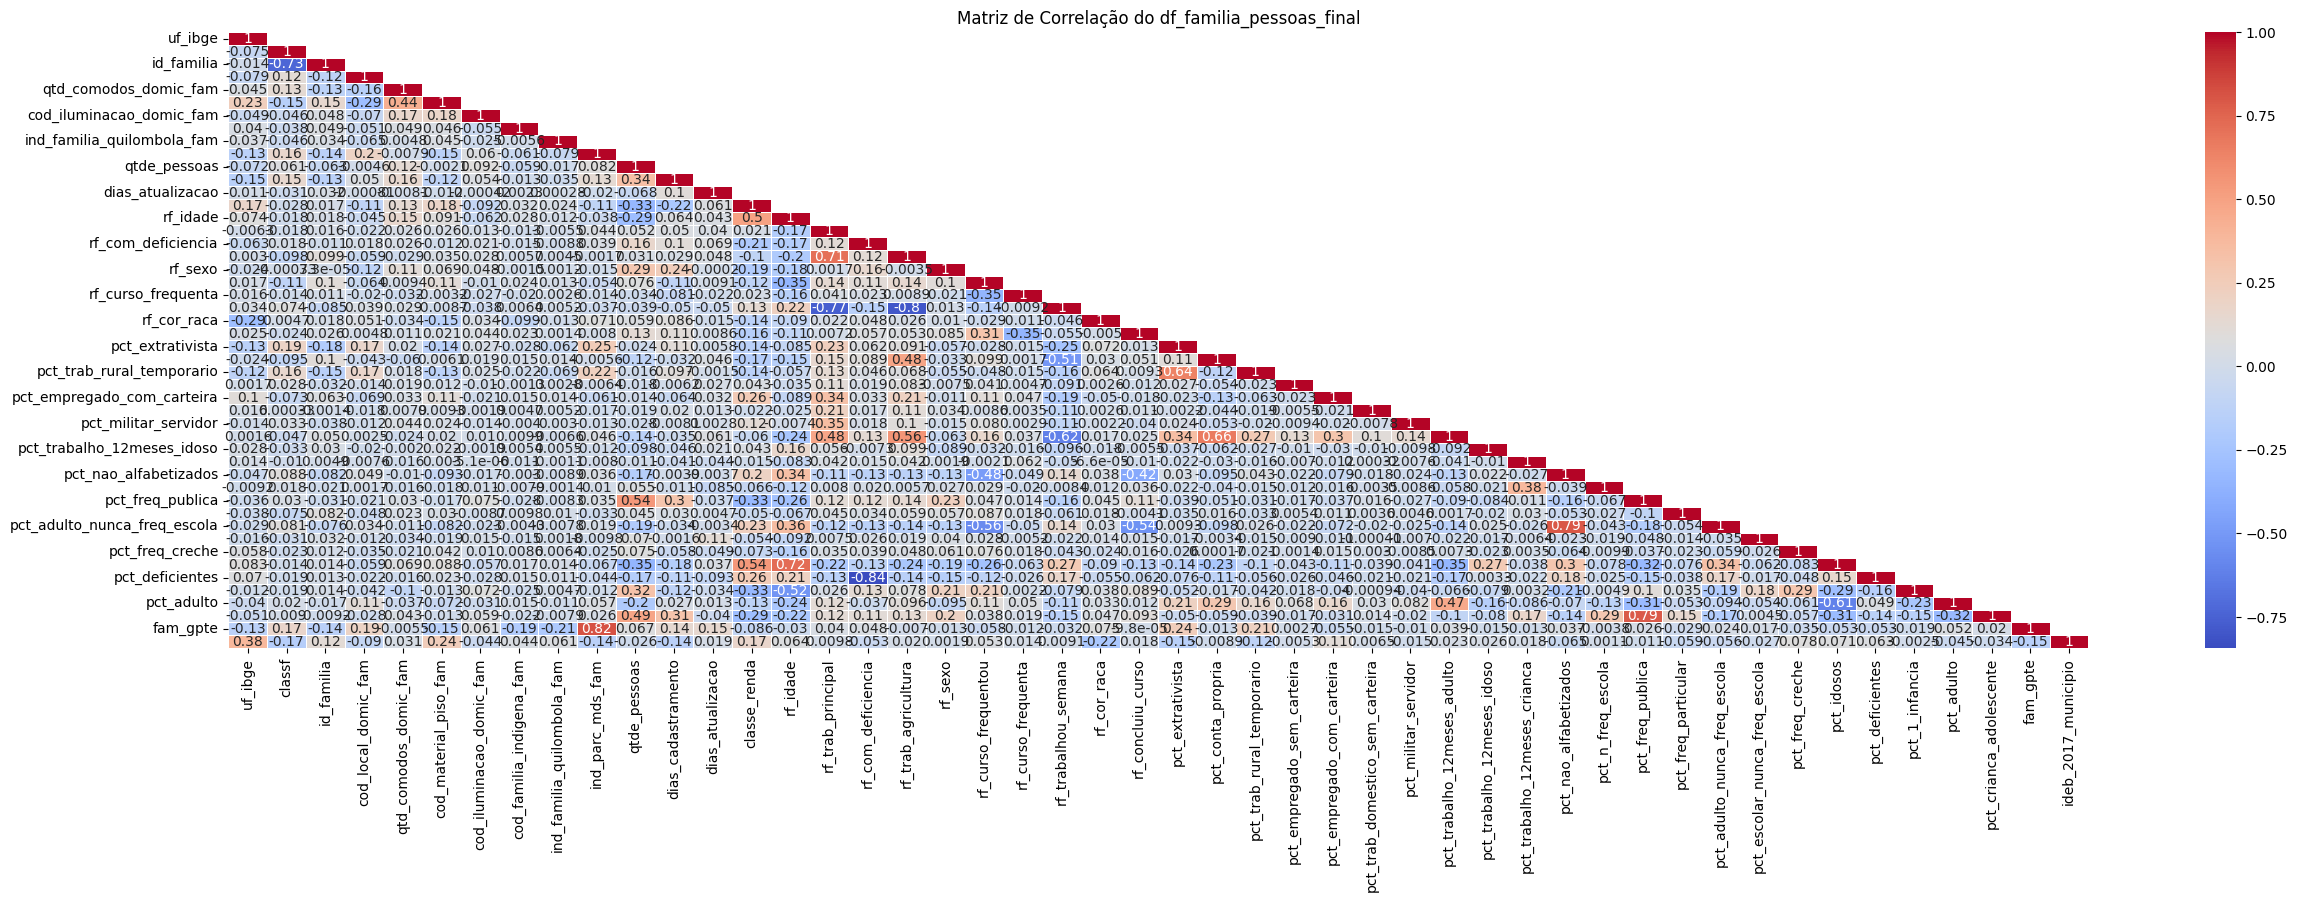

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plotando o gráfico de correlações com a máscara
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação do df_familia_pessoas_final')
plt.show()

In [ ]:
# Selecionar apenas as colunas numéricas
numeric_cols = df_familia_pessoas_final.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_familia_pessoas_final[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")

In [ ]:
df_familia_pessoas_final = df_familia_pessoas_final.drop(['ind_parc_mds_fam'], axis=1)

In [ ]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final.drop('classe_renda', axis=1)

y = df_familia_pessoas_final['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96502, 46)


,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,fam_gpte,ideb_2017_municipio
0,42,2,268503,1.0,5.0,5.0,1.0,2.0,2.0,4,...,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.5,0.0,6.3
1,29,3,2888440,2.0,2.0,2.0,1.0,2.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,5.1
2,35,3,2113517,1.0,5.0,5.0,1.0,2.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,5.7
3,33,2,4419096,1.0,3.0,5.0,1.0,2.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,4.7
4,28,1,4241219,1.0,4.0,5.0,1.0,2.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,4.6


In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
!pip install xgboost -q

In [ ]:
!pip install catboost -q

In [ ]:
!pip install scikit-optimize -q

# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, make_scorer # Assuming you're using these too
import numpy as np # Assuming you're using numpy
from skopt import BayesSearchCV # Import BayesSearchCV from skopt
from sklearn.metrics import classification_report


In [ ]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

In [ ]:
import numpy as np

models = {
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [100, 200, 250, 300],  # Testando mais valores
            'classifier__max_depth': [3, 4, 5, 6],  # Adicionando mais profundidades
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2]  # Variando a taxa de aprendizado
        }
    }
}

best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)

    # Armazenar o melhor modelo
    best_model = grid_search.best_estimator_
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

    # Realizando a validação cruzada com o melhor modelo
    cv_scores = cross_val_score(best_model, X_train, y_train_mapped, cv=3, scoring='accuracy', n_jobs=-1)
    best_score = cv_scores.mean()

    importances = best_model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    selected_features = X_train.columns[indices]
    # Imprimir as features testadas e a acurácia
    print(f"Features testadas: {selected_features}")
    print("Classification Report:")
    y_pred = best_model.predict(X_train)
    print(classification_report(y_train_mapped, y_pred))

    # Iterar filtrando features
    while True:
        # Obter as importâncias das features
        best_model.fit(X_train, y_train_mapped)
        # Access the XGBClassifier within the pipeline using named_steps
        importances = best_model.named_steps['classifier'].feature_importances_

        # Ordenar as features e obter a mediana
        indices = np.argsort(importances)[::-1]
        median_importance = np.median(importances)
        print (median_importance)
        # Filtrar as features
        selected_features = X_train.columns[indices[importances > median_importance]]
        X_train_new = X_train[selected_features]

        # Retreinar o modelo com as features selecionadas
        best_model.fit(X_train_new, y_train_mapped)

        # Avaliar a acurácia
        cv_scores = cross_val_score(best_model, X_train_new, y_train_mapped, cv=3, scoring='accuracy', n_jobs=-1)
        new_score = cv_scores.mean()

        # Imprimir as features testadas e a acurácia
        print(f"Features testadas: {selected_features}")
        print("Classification Report:")
        y_pred = best_model.predict(X_train_new)
        print(classification_report(y_train_mapped, y_pred))

        # Se a acurácia diminuiu, parar
        if new_score < best_score:
            break

        # Atualizar a melhor pontuação e o conjunto de treinamento
        best_score = new_score
        X_train = X_train_new


Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}
Features testadas: Index(['pct_idosos', 'pct_empregado_com_carteira', 'pct_militar_servidor',
       'pct_deficientes', 'pct_adulto', 'qtde_pessoas', 'pct_1_infancia',
       'pct_trab_rural_temporario', 'pct_freq_publica',
       'pct_trabalho_12meses_adulto', 'cod_material_piso_fam',
       'pct_trabalho_12meses_idoso', 'rf_trab_principal', 'rf_idade',
       'rf_curso_frequenta', 'pct_empregado_sem_carteira',
       'rf_trab_agricultura', 'cod_local_domic_fam', 'pct_conta_propria',
       'uf_ibge', 'pct_trab_domestico_sem_carteira', 'rf_com_deficiencia',
       'rf_trabalhou_semana', 'qtd_comodos_domic_fam',
       'cod_iluminacao_domic_fam', 'pct_extrativista', 'dias_cadastramento',
       'pct_trabalho_12meses_crianca', 'ideb_2017_municipio', 'classf',
       'dias_atualizacao', 'pct_crianca_adolescente', 'rf_curso_frequentou',
       'rf_concluiu

In [ ]:
import numpy as np

models = {
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [200],  # Testando mais valores
            'classifier__max_depth': [6],  # Adicionando mais profundidades
            'classifier__learning_rate': [0.1]  # Variando a taxa de aprendizado
        }
    }
}

best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)

    # Armazenar o melhor modelo
    best_model = grid_search.best_estimator_
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

    # Realizando a validação cruzada com o melhor modelo
    cv_scores = cross_val_score(best_model, X_train, y_train_mapped, cv=3, scoring='accuracy', n_jobs=-1)
    best_score = cv_scores.mean()

    importances = best_model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    selected_features = X_train.columns[indices]
    # Imprimir as features testadas e a acurácia
    print(f"Features testadas: {selected_features}")
    print("Classification Report:")
    y_pred = best_model.predict(X_train)
    print(classification_report(y_train_mapped, y_pred))


    # Obter as probabilidades preditivas
    y_proba = best_model.predict_proba(X_train)[:, 1]  # Probabilidade da classe positiva

    # Definir o limiar (ajuste conforme necessário)
    threshold = 0.0

    # Criar função para classificação com base no limiar
    def predict_with_threshold(y_proba, threshold):
        return np.where(y_proba >= threshold, 1, 0)

    # Obter as classes preditivas com o novo limiar
    y_pred = predict_with_threshold(y_proba, threshold)

    print(classification_report(y_train_mapped, y_pred))

Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}
Features testadas: Index(['pct_idosos', 'pct_empregado_com_carteira', 'pct_militar_servidor',
       'pct_deficientes', 'pct_adulto', 'qtde_pessoas', 'pct_1_infancia',
       'pct_trab_rural_temporario', 'pct_freq_publica',
       'pct_trabalho_12meses_adulto', 'cod_material_piso_fam',
       'pct_trabalho_12meses_idoso', 'rf_trab_principal', 'rf_idade',
       'rf_curso_frequenta', 'pct_empregado_sem_carteira',
       'rf_trab_agricultura', 'cod_local_domic_fam', 'pct_conta_propria',
       'uf_ibge', 'pct_trab_domestico_sem_carteira', 'rf_com_deficiencia',
       'rf_trabalhou_semana', 'qtd_comodos_domic_fam',
       'cod_iluminacao_domic_fam', 'pct_extrativista', 'dias_cadastramento',
       'pct_trabalho_12meses_crianca', 'ideb_2017_municipio', 'classf',
       'dias_atualizacao', 'pct_crianca_adolescente', 'rf_curso_frequentou',
       'rf_concluiu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_proba

array([0.79688805, 0.40459204, 0.02192961, ..., 0.10188732, 0.03409676,
       0.01685008], dtype=float32)

In [ ]:
!pip install shap -q # Install the shap package

In [ ]:
import shap

In [ ]:
import numpy as np
import shap

models = {
  'XGBoost': {
    'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
    'param_grid': {
      'classifier__n_estimators': [200],  # Testando mais valores
      'classifier__max_depth': [6],               # Adicionando mais profundidades
      'classifier__learning_rate': [0.1]   # Variando a taxa de aprendizado
    }
  }
}

best_models = {}

for model_name, model_info in models.items():
  # Create the pipeline
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model_info['model'])
  ])

  # Define GridSearchCV
  grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
  grid_search.fit(X_train, y_train_mapped)

  # Store the best model
  best_model = grid_search.best_estimator_
  best_models[model_name] = grid_search.best_estimator_
  print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

  # Realizando a validação cruzada com o melhor modelo
  cv_scores = cross_val_score(best_model, X_train, y_train_mapped, cv=3, scoring='accuracy', n_jobs=-1)
  best_score = cv_scores.mean()

  # Use SHAP to explain predictions
  explainer = shap.TreeExplainer(best_model.named_steps['classifier'])
  shap_values = explainer.shap_values(X_train)

  # Calculate mean SHAP importance across classes for ranking
mean_shap_importances = np.mean(np.abs(shap_values), axis=(0, 2))

# Sort features by mean SHAP importance
feature_ranks = np.argsort(mean_shap_importances)[::-1]

print(f"Feature importances using SHAP for {model_name}:")
for feature, rank in zip(feature_names[feature_ranks], range(1, len(feature_names) + 1)):
    print(f"{rank}. {feature} (SHAP importance: {mean_shap_importances[feature_ranks[rank-1]]:.4f})")

  # Optional: Select features based on a threshold or other criteria
  # ... (code for feature selection using shap_importances)

  # ... (rest of your code for model training and evaluation)

Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}
Feature importances using SHAP for XGBoost:
1. rf_idade (SHAP importance: 0.8580)
2. dias_cadastramento (SHAP importance: 0.4802)
3. dias_atualizacao (SHAP importance: 0.4040)
4. qtd_comodos_domic_fam (SHAP importance: 0.3319)
5. qtde_pessoas (SHAP importance: 0.3186)
6. rf_curso_frequentou (SHAP importance: 0.2960)
7. id_familia (SHAP importance: 0.2949)
8. ideb_2017_municipio (SHAP importance: 0.2684)
9. pct_idosos (SHAP importance: 0.2313)
10. uf_ibge (SHAP importance: 0.1520)
11. pct_empregado_com_carteira (SHAP importance: 0.1512)
12. pct_freq_publica (SHAP importance: 0.1136)
13. pct_adulto (SHAP importance: 0.1110)
14. rf_cor_raca (SHAP importance: 0.1036)
15. pct_1_infancia (SHAP importance: 0.1026)
16. pct_trabalho_12meses_adulto (SHAP importance: 0.0866)
17. pct_conta_propria (SHAP importance: 0.0779)
18. classf (SHAP importance: 0.0743)
19. r

In [ ]:
!pip install lime

In [ ]:
y_train

,classe_renda
60273,1.0
76989,1.0
78633,2.0
88218,0.0
77159,0.0
...,...
31203,2.0
40799,0.0
65857,2.0
7902,0.0


In [36]:
import numpy as np
import lime
from lime import lime_tabular

models = {
  'XGBoost': {
    'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
    'param_grid': {
      'classifier__n_estimators': [200],  # Testando mais valores
      'classifier__max_depth': [6],               # Adicionando mais profundidades
      'classifier__learning_rate': [0.1]   # Variando a taxa de aprendizado
    }
  }
}

best_models = {}

for model_name, model_info in models.items():
  # ... (restante do código para treinamento e avaliação do modelo)
  # Create the pipeline
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', model_info['model'])
  ])

  # Define GridSearchCV
  grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
  grid_search.fit(X_train, y_train_mapped)

  # Store the best model
  best_model = grid_search.best_estimator_
  best_models[model_name] = grid_search.best_estimator_
  print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

  # Realizando a validação cruzada com o melhor modelo
  cv_scores = cross_val_score(best_model, X_train, y_train_mapped, cv=3, scoring='accuracy', n_jobs=-1)
  best_score = cv_scores.mean()

  # Use LIME to explain predictions
  explainer = lime_tabular.LimeTabularExplainer(
      training_data=X_train.values,  # Convert X_train to a NumPy array
      feature_names=X_train.columns.tolist(),  # Convert columns to a list
      class_names=['0.0', '1.0', '2.0'],
      mode="classification"
  )

  # Explicar uma instância específica (substitua pelo índice da instância desejada)
  instance = X_train.iloc[0].values  # Convert instance to a NumPy array
  exp = explainer.explain_instance(instance, best_model.predict_proba, num_features=10)

  # Imprimir a explicação
  print(exp.as_list())

  # Extrair as importâncias das features da explicação
  lime_importances = {}
  for feature, weight in exp.as_list():
      lime_importances[feature] = abs(weight)

  # Ordenar as features por importância LIME
  sorted_features = sorted(lime_importances, key=lime_importances.get, reverse=True)

  print(f"Importância das features usando LIME para {model_name}:")
  for feature in sorted_features:
      print(f"{feature}: {lime_importances[feature]}")

  # Selecionar features com base nas importâncias LIME
  # ... (código para seleção de features)

Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[('pct_empregado_com_carteira > 0.00', 0.18337160416178788), ('qtde_pessoas <= 2.00', -0.15902588141806903), ('pct_militar_servidor <= 0.00', -0.14061955990811395), ('pct_idosos <= 0.00', -0.10543662553886109), ('pct_deficientes <= 0.00', -0.0880890175662032), ('4.00 < cod_material_piso_fam <= 5.00', 0.05722867048755105), ('pct_empregado_sem_carteira <= 0.00', -0.04952532418546885), ('rf_idade > 52.00', 0.04898524458451365), ('pct_trabalho_12meses_idoso <= 0.00', 0.046360443525294386), ('pct_trabalho_12meses_crianca <= 0.00', -0.040368849404673224)]
Importância das features usando LIME para XGBoost:
pct_empregado_com_carteira > 0.00: 0.18337160416178788
qtde_pessoas <= 2.00: 0.15902588141806903
pct_militar_servidor <= 0.00: 0.14061955990811395
pct_idosos <= 0.00: 0.10543662553886109
pct_deficientes <= 0.00: 0.0880890175662032
4.00 < cod_material_piso_fam <= 5.00: 0.05722867048755105
pct_empregado_sem_carteira <= 0.00: 0.04952532418546885
rf_idade > 52.00: 0.04898524458451365
pct_trabal

In [ ]:
selected_features

Index(['pct_idosos', 'pct_deficientes', 'qtde_pessoas',
       'pct_trabalho_12meses_adulto', 'rf_trab_principal', 'rf_idade',
       'rf_curso_frequenta', 'pct_empregado_sem_carteira', 'pct_conta_propria',
       'uf_ibge', 'qtd_comodos_domic_fam', 'cod_iluminacao_domic_fam',
       'pct_extrativista', 'dias_cadastramento',
       'pct_trabalho_12meses_crianca', 'ideb_2017_municipio', 'classf',
       'dias_atualizacao', 'rf_sexo', 'pct_escolar_nunca_freq_escola',
       'pct_adulto_nunca_freq_escola', 'pct_freq_creche', 'pct_n_freq_escola'],
      dtype='object')

In [ ]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final[selected_features]
y = df_familia_pessoas_final['classe_renda']


In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Definir hiperparâmetros para a busca bayesiana
best_xgb_params = grid_search.best_params_
param_grid_bayes = {
    'xgb__eta': [0.01, 0.015, 0.025, 0.05, 0.1],
    'xgb__gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'xgb__max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
    'xgb__min_child_weight': [1, 3, 5, 7],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__lambda': [0.01, 0.1, 1.0],
    'xgb__alpha': [0, 0.1, 0.5, 1.0]
}

# Definir scale_pos_weight
n_sample_max =  y.value_counts().idxmax()
n_sample_min =  y.value_counts().idxmin()

scale_pos_weight = np.sqrt(n_sample_max / n_sample_min) #classe majoritária/classe minoritária

# Criar pipeline com StandardScaler e XGBoost Classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        random_state=1,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

# Realizar a busca bayesiana com validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Usar recall como métrica de scoring, especificando 'macro' para average
scorer = make_scorer(recall_score, average='macro') # Changed this line

bayes_search_xgb = BayesSearchCV(
    pipeline_xgb,
    search_spaces=param_grid_bayes,
    n_iter=30,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    random_state=1
)

# Ajustar o modelo ao conjunto de treino balanceado por pesos scale_pos_weight
bayes_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb_model = bayes_search_xgb.best_estimator_

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros com scale_pos_weight: {bayes_search_xgb.best_params_}")

# Fazer previsões com o conjunto de teste original
y_pred_xgb_smote = best_xgb_model.predict(X_test)

# Relatório de classificação
classification_report_xgb = classification_report(y_test, y_pred_xgb_smote)

print('Classification report para XGBoost com scale_pos_weight: \n')
print(classification_report_xgb)

KeyboardInterrupt: 